In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
city_data.sort_values("city").head()

,city,driver_count,type
61,Amandaburgh,12,Urban
9,Barajasview,26,Urban
90,Barronchester,11,Suburban
88,Bethanyland,22,Suburban
115,Bradshawfurt,7,Rural


In [2]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
cityName = city_data.set_index(["city"])

In [5]:
#City Type (Urban, Suburban, Rural)
cityType = city_data.set_index(["city"])["type"]

In [6]:
#Total Number of Rides Per City
totalRidesPerCity = data_complete.groupby("city")["ride_id"].count()

In [7]:
#Total Number of Drivers Per City
totalDriversPerCity = city_data.groupby("city")["driver_count"].sum()

In [8]:
#Average Fare Per City
averageFarePerCity = data_complete.groupby("city")["fare"].mean()

In [9]:
dataSummary = pd.DataFrame({"Average Fare Per City": averageFarePerCity,
                            "Total Rides Per City": totalRidesPerCity,
                            "Total Drivers Per City": totalDriversPerCity,
                            "City Type": cityType
})
dataSummary.head()

,Average Fare Per City,Total Rides Per City,Total Drivers Per City,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [10]:
urban = dataSummary.loc[dataSummary["City Type"] == "Urban", :]

In [11]:
suburban = dataSummary.loc[dataSummary["City Type"] == "Suburban", :]

In [12]:
rural = dataSummary.loc[dataSummary["City Type"] == "Rural", :]

In [13]:
x_axis = dataSummary["Total Rides Per City"]
y_axis = dataSummary["Average Fare Per City"]
x_urban = urban["Total Rides Per City"]
y_urban = urban["Average Fare Per City"]

In [14]:
x_suburban = suburban["Total Rides Per City"]
y_suburban = suburban["Average Fare Per City"]

In [15]:
x_rural = rural["Total Rides Per City"]
y_rural = rural["Average Fare Per City"]

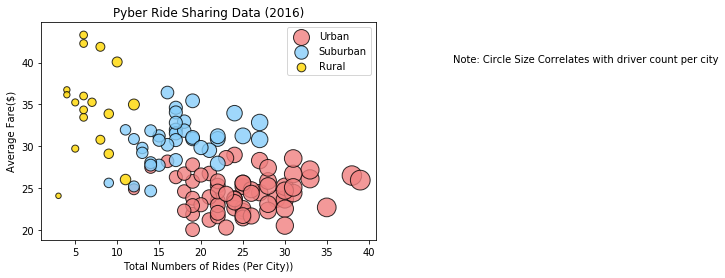

In [16]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(50,40,s="Note: Circle Size Correlates with driver count per city")
plt.scatter(x_urban, y_urban, s=x_urban*10, marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.8, label="Urban")
plt.scatter(x_suburban, y_suburban, s=x_suburban*10, marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.8, label="Suburban")
plt.scatter(x_rural, y_rural, s=x_rural*10, marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.8, label="Rural")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right', prop={'size':10})

In [17]:
#Percentage of Total Fares by City Type
totalFares = data_complete["fare"].sum()

In [18]:
urbanFares = data_complete.loc[data_complete["type"] == "Urban", :].sum()
totalUrbanFare = urbanFares["fare"]

In [19]:
suburbanFares = data_complete.loc[data_complete["type"] == "Suburban", :].sum()
totalSuburbanFare = suburbanFares["fare"]

In [20]:
ruralFares = data_complete.loc[data_complete["type"] == "Rural", :].sum()
totalRuralFare = ruralFares["fare"]

In [21]:
#Finding Percentages
urbanFarePercentage = totalUrbanFare / totalFares
urbanFarePercentage
urbanFarePercentageFinal = "{:.1%}".format(urbanFarePercentage)
urbanFarePercentageFinal

'62.7%'

In [22]:
suburbanFarePercentage = totalSuburbanFare / totalFares
suburbanFarePercentageFinal = "{:.1%}".format(suburbanFarePercentage)
suburbanFarePercentageFinal

'30.5%'

In [23]:
ruralFarePercentage = totalRuralFare / totalFares
ruralFarePercentageFinal = "{:.1%}".format(ruralFarePercentage)
ruralFarePercentageFinal

'6.8%'

In [24]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [62.7, 6.8, 30.5 ]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x10a808518>,
 [Text(-1.10575,-0.466177,'Urban'),
  Text(0.932446,-0.583562,'Rural'),
  Text(0.899965,0.632506,'Suburban')],
 [Text(-0.64502,-0.271937,'62.7%'),
  Text(0.508607,-0.318307,'6.8%'),
  Text(0.49089,0.345003,'30.5%')])

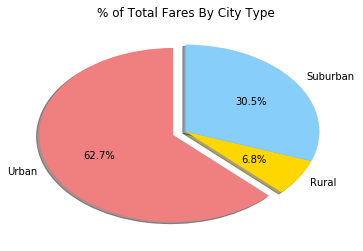

In [25]:
plt.title("% of Total Fares By City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [26]:
totalRides = data_complete["ride_id"].count()

In [27]:
urbanRides = data_complete.loc[data_complete["type"] == "Urban", :].count()
totalUrbanRides = urbanRides["ride_id"]

In [28]:
suburbanRides = data_complete.loc[data_complete["type"] == "Suburban", :].count()
totalSuburbanRides = suburbanRides["ride_id"]

In [29]:
ruralRides = data_complete.loc[data_complete["type"] == "Rural", :].count()
totalRuralRides = ruralRides["ride_id"]

In [30]:
urbanRidePercentage = totalUrbanRides / totalRides
urbanRidePercentageFinal = "{:.1%}".format(urbanRidePercentage)
urbanRidePercentageFinal

'68.4%'

In [31]:
suburbanRidePercentage = totalSuburbanRides / totalRides
suburbanRidePercentageFinal = "{:.1%}".format(suburbanRidePercentage)
suburbanRidePercentageFinal

'26.3%'

In [32]:
ruralRidePercentage = totalRuralRides / totalRides
ruralRidePercentageFinal = "{:.1%}".format(ruralRidePercentage)
ruralRidePercentageFinal

'5.3%'

In [33]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [68.4,5.3, 26.3 ]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x1151300b8>,
 [Text(-1.00503,-0.655673,'Urban'),
  Text(1.0663,-0.27021,'Rural'),
  Text(0.808927,0.745411,'Suburban')],
 [Text(-0.58627,-0.382476,'68.4%'),
  Text(0.581616,-0.147387,'5.3%'),
  Text(0.441233,0.406588,'26.3%')])

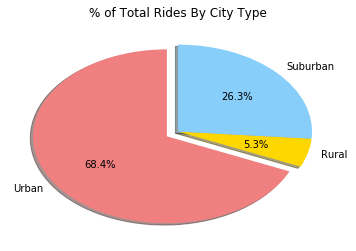

In [34]:
plt.title("% of Total Rides By City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [35]:
totalDrivers = city_data["driver_count"].sum()

In [36]:
urbanDrivers = city_data.loc[city_data["type"] == "Urban", :].sum()
totalUrbanDrivers = urbanDrivers["driver_count"]

In [37]:
suburbanDrivers = city_data.loc[city_data["type"] == "Suburban", :].sum()
totalSuburbanDrivers = suburbanDrivers["driver_count"]

In [38]:
ruralDrivers = city_data.loc[city_data["type"] == "Rural", :].sum()
totalRuralDrivers = ruralDrivers["driver_count"]

In [39]:
urbanDriverPercentage = totalUrbanDrivers / totalDrivers
urbanDriverPercentageFinal = "{:.1%}".format(urbanDriverPercentage)
urbanDriverPercentageFinal

'80.9%'

In [40]:
suburbanDriverPercentage = totalSuburbanDrivers / totalDrivers
suburbanDriverPercentageFinal = "{:.1%}".format(suburbanDriverPercentage)
suburbanDriverPercentageFinal

'16.5%'

In [41]:
ruralDriverPercentage = totalRuralDrivers / totalDrivers
ruralDriverPercentageFinal = "{:.1%}".format(ruralDriverPercentage)
ruralDriverPercentageFinal

'2.6%'

In [42]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [80.9,2.6, 16.5 ]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x1151ce9b0>,
 [Text(-0.677615,-0.990373,'Urban'),
  Text(0.989346,0.480827,'Rural'),
  Text(0.545004,0.955495,'Suburban')],
 [Text(-0.395275,-0.577717,'80.9%'),
  Text(0.539643,0.26227,'2.6%'),
  Text(0.297275,0.521179,'16.5%')])

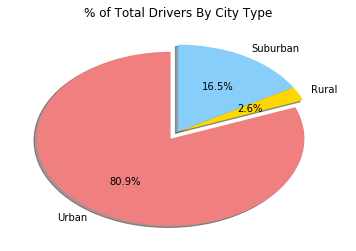

In [43]:
plt.title("% of Total Drivers By City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)